In [1]:
import pandas as pd
import numpy as np

In [2]:
WQI_complete = pd.read_excel('Complete_Data_WQI.xlsx')
WQI_complete.drop(columns='Unnamed: 0',inplace=True)
WQI_complete.head()

,Sulfate (mg/L),Chloride (mg/L),Sodium (mg/L),Potassium (mg/L),Calcium (mg/L),Magnesium (mg/L),Total Dissolved Solids (mg/L),Turbidity (NTU),Temperature (deg C),pH,Dissolved Oxygen (mg/L),Nitrate (mg/L),Biochemical Oxygen Demand (mg/L),Fecal Coliform (cfu/100ml),WQI,WQS
0,2.800000,0.516000,0.303000,0.148000,1.710000,0.391000,121.463462,6.045000,0.100000,6.190000,10.346667,0.740,1.10,80.0,35.671682,Good
1,8.552500,17.076929,8.072056,1.238306,8.310093,2.726863,121.463462,6.045000,0.658482,6.366908,10.346667,0.740,1.10,80.0,38.840933,Good
2,10.470000,22.597238,10.661741,1.601741,10.510124,3.505485,121.463462,6.045000,1.216964,6.543816,10.346667,0.740,1.10,80.0,41.019089,Good
3,11.428750,25.357393,11.956583,1.783458,11.610140,3.894795,121.463462,6.045000,1.775446,6.720724,10.346667,0.740,1.10,80.0,42.949471,Good
4,12.897286,27.450200,13.006695,2.264624,12.937255,4.590122,121.463462,7.064571,2.333929,6.897632,11.004899,0.736,1.12,80.0,48.564266,Good


In [3]:
data_x = WQI_complete.drop(columns=['WQI','WQS'])
data_y_wqs = WQI_complete['WQS']

In [4]:
WQI_correlated = pd.read_excel('Correlation_Data_WQI.xlsx')
WQI_correlated.drop(columns='Unnamed: 0',inplace=True)
WQI_correlated.head()

,Temperature (deg C),Dissolved Oxygen (mg/L),Turbidity (NTU),Biochemical Oxygen Demand (mg/L),Total Dissolved Solids (mg/L),Fecal Coliform (cfu/100ml),pH,Sulfate (mg/L),WQI,WQS
0,0.100000,10.346667,6.045000,1.10,121.463462,80.0,6.190000,2.800000,35.671682,Good
1,0.658482,10.346667,6.045000,1.10,121.463462,80.0,6.366908,8.552500,38.840933,Good
2,1.216964,10.346667,6.045000,1.10,121.463462,80.0,6.543816,10.470000,41.019089,Good
3,1.775446,10.346667,6.045000,1.10,121.463462,80.0,6.720724,11.428750,42.949471,Good
4,2.333929,11.004899,7.064571,1.12,121.463462,80.0,6.897632,12.897286,48.564266,Good


In [5]:
data_x_corr =  WQI_correlated.drop(columns=['WQI', 'WQS'])
data_y_corr = WQI_correlated['WQS']

In [6]:
WQI_test = pd.read_excel('WQI_test_set.xlsx')
WQI_test.head()

,Sulfate (mg/L),Chloride (mg/L),Sodium (mg/L),Potassium (mg/L),Calcium (mg/L),Magnesium (mg/L),Total Dissolved Solids (mg/L),Turbidity (NTU),Temperature (deg C),pH,Dissolved Oxygen (mg/L),Nitrate (mg/L),Biochemical Oxygen Demand (mg/L),Fecal Coliform (cfu/100ml),WQI,WQS
0,16.000000,12.250000,6.600000,1.416908,11.666667,3.746072,123.50,4.825000,8.500000,6.903333,13.050000,1.45,1.72,310.0,39.490080,Good
1,21.165000,14.080000,4.356500,2.018000,25.315000,6.051000,265.00,4.825000,6.933333,6.830000,10.200000,1.45,1.72,310.0,45.668848,Good
2,10.102857,4.587714,2.683429,0.745429,7.027143,2.315857,119.75,4.825000,5.728571,6.401111,9.356473,1.45,1.72,310.0,41.486400,Good
3,12.351111,7.307375,3.940875,1.314500,13.101818,3.391000,118.00,18.133333,4.911111,7.342727,12.320000,1.45,1.72,310.0,104.832381,Unsuitable for drinking
4,18.220000,10.921167,7.469500,1.634000,14.175000,4.721000,169.50,62.000000,5.025000,7.325000,12.000000,1.45,1.72,310.0,305.778116,Unsuitable for drinking


In [7]:
x_test = WQI_test.drop(columns=['WQI','WQS'])
y_test = WQI_test['WQS']

In [8]:
WQI_test_corr = pd.read_excel('WQI_test_correlated.xlsx')

In [9]:
x_test_corr = WQI_test_corr.drop(columns=['WQI','WQS'])
y_test_corr = WQI_test_corr['WQS']

### PCA

In [10]:
## Splitting data into train and val
from sklearn.model_selection import train_test_split 

x_train, x_val, y_train, y_val = train_test_split(data_x,data_y_wqs,test_size = 0.2)

from sklearn.preprocessing import MinMaxScaler  

# Normalize the features for PCA
minmax = MinMaxScaler()
x_train_norm = minmax.fit_transform(x_train)
x_val_norm = minmax.transform(x_val)

## PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
x_train_pca = pca.fit_transform(x_train_norm)
x_val_pca = pca.transform(x_val_norm)

In [11]:
## Performing PCA on test data

# Normalize the test set for PCA
x_test_norm = minmax.transform(x_test)

## PCA
x_test_pca = pca.transform(x_test_norm)

# Models

## Decision Tree

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

##### With PCA

In [13]:
## using train & validation set
pca_dt = DecisionTreeClassifier(criterion = "entropy", random_state = 10)
pca_dt.fit(x_train_pca, y_train)
y_pred_val_pca_dt = pca_dt.predict(x_val_pca)

print('Train-Val split- DT model- PCA')
cm_pca_dt = confusion_matrix(y_val, y_pred_val_pca_dt)
print(f'Confusion Matrix: \n{cm_pca_dt}')
print(f'\nClassification report : \n {classification_report(y_val, y_pred_val_pca_dt)}')

Train-Val split- DT model- PCA
Confusion Matrix: 
[[ 15   1   1   5]
 [  0  94   6   0]
 [  6   6 128   2]
 [  1   0   2  99]]

Classification report : 
                          precision    recall  f1-score   support

                    Bad       0.68      0.68      0.68        22
                   Good       0.93      0.94      0.94       100
                 Medium       0.93      0.90      0.92       142
Unsuitable for drinking       0.93      0.97      0.95       102

               accuracy                           0.92       366
              macro avg       0.87      0.87      0.87       366
           weighted avg       0.92      0.92      0.92       366



In [14]:
## test set

y_pred_test_pca_dt = pca_dt.predict(x_test_pca)

print('Test split- DT model- PCA')
cm_pca_test_dt = confusion_matrix(y_test, y_pred_test_pca_dt)
print(f'Confusion Matrix: \n{cm_pca_test_dt}')
print(f'\nClassification report : \n {classification_report(y_test, y_pred_test_pca_dt)}')

Test split- DT model- PCA
Confusion Matrix: 
[[ 18   0   0   7  11]
 [ 10   0   0   0   4]
 [158   0   0 105  99]
 [ 79   0   1  44  39]
 [ 13   0   4   6  41]]

Classification report : 
                          precision    recall  f1-score   support

                    Bad       0.06      0.50      0.11        36
              Excellent       0.00      0.00      0.00        14
                   Good       0.00      0.00      0.00       362
                 Medium       0.27      0.27      0.27       163
Unsuitable for drinking       0.21      0.64      0.32        64

               accuracy                           0.16       639
              macro avg       0.11      0.28      0.14       639
           weighted avg       0.09      0.16      0.11       639



C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Only high correlation features

In [15]:
## K Fold
from sklearn.model_selection import KFold 

k_fold_splits = KFold(n_splits=5, shuffle=True, random_state=7)

In [16]:
corr_dt_model = DecisionTreeClassifier(criterion = "entropy", random_state = 10)
corr_dt_model.fit(data_x_corr,data_y_corr)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [17]:
## model evaluation - train & validation set
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



scores = {'accuracy': 'accuracy',
           'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score, average='weighted'),
           }


dt_score_corr = cross_validate(corr_dt_model, data_x_corr, data_y_corr, scoring=scores, 
                           cv=k_fold_splits, n_jobs=-1, error_score="raise")

accuracy_corr = np.mean(dt_score_corr['test_accuracy'])
precision_corr = np.mean(dt_score_corr['test_precision'])
recall_corr = np.mean(dt_score_corr['test_recall'])
f1_corr = np.mean(dt_score_corr['test_f1'])

print('K Fold Validation- DT model- for correlation features- Train & Validation sets')
print(f'Accuracy: {accuracy_corr:.4f}')
print(f'Precision: {precision_corr:.4f}')
print(f'Recall: {recall_corr:.4f}')
print(f'F1 score: {f1_corr:.4f}')

K Fold Validation- DT model- for correlation features- Train & Validation sets
Accuracy: 0.9743
Precision: 0.9745
Recall: 0.9743
F1 score: 0.9743


In [18]:
### Test set


y_pred_test_corr_dt = corr_dt_model.predict(x_test_corr)


print('K Fold Validation- DT model- for correlation features- Test set')

print(f'Confusion Matrix: \n{confusion_matrix(y_test_corr, y_pred_test_corr_dt)}')
print(f'\nClassification report : \n {classification_report(y_test_corr, y_pred_test_corr_dt)}')

K Fold Validation- DT model- for correlation features- Test set
Confusion Matrix: 
[[ 33   0   0   0   3]
 [  3   0   9   2   0]
 [162   0 178  22   0]
 [141   0  17   5   0]
 [ 10   0   0   0  54]]

Classification report : 
                          precision    recall  f1-score   support

                    Bad       0.09      0.92      0.17        36
              Excellent       0.00      0.00      0.00        14
                   Good       0.87      0.49      0.63       362
                 Medium       0.17      0.03      0.05       163
Unsuitable for drinking       0.95      0.84      0.89        64

               accuracy                           0.42       639
              macro avg       0.42      0.46      0.35       639
           weighted avg       0.64      0.42      0.47       639



C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### All features

In [19]:
dt_model = DecisionTreeClassifier(criterion = "entropy", random_state = 10)
dt_model.fit(data_x,data_y_wqs)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [20]:
## model evaluation - train & val set

scores = {'accuracy': 'accuracy',
           'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score, average='weighted'),
           }


dt_score = cross_validate(dt_model, data_x, data_y_wqs, scoring=scores, 
                           cv=k_fold_splits, n_jobs=-1, error_score="raise")

accuracy = np.mean(dt_score['test_accuracy'])
precision = np.mean(dt_score['test_precision'])
recall = np.mean(dt_score['test_recall'])
f1 = np.mean(dt_score['test_f1'])

print('K Fold Validation- DT model - for all features- Train & Validation sets')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')


K Fold Validation- DT model - for all features- Train & Validation sets
Accuracy: 0.9726
Precision: 0.9727
Recall: 0.9726
F1 score: 0.9726


In [21]:
### Test set


y_pred_test_dt = dt_model.predict(x_test)


print('K Fold Validation- DT model- for all features- Test set')

print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test_dt)}')
print(f'\nClassification report : \n {classification_report(y_test, y_pred_test_dt)}')

K Fold Validation- DT model- for all features- Test set
Confusion Matrix: 
[[ 23   0   0  10   3]
 [  0   0   6   8   0]
 [ 18   0 144 200   0]
 [ 36   0  17 110   0]
 [  6   0   0   5  53]]

Classification report : 
                          precision    recall  f1-score   support

                    Bad       0.28      0.64      0.39        36
              Excellent       0.00      0.00      0.00        14
                   Good       0.86      0.40      0.54       362
                 Medium       0.33      0.67      0.44       163
Unsuitable for drinking       0.95      0.83      0.88        64

               accuracy                           0.52       639
              macro avg       0.48      0.51      0.45       639
           weighted avg       0.68      0.52      0.53       639



C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
dt_results = pd.DataFrame({'Type':['with PCA','with correlated features','with all features'], 'Accuracy':[ 0.16,0.42,0.52]})
print('Decision Tree')
dt_results

Decision Tree


,Type,Accuracy
0,with PCA,0.16
1,with correlated features,0.42
2,with all features,0.52


#### In DT, all features gives best results comparitively

## SVM

In [22]:
from sklearn import svm

##### With PCA

In [23]:
## using train & validation set
pca_svm = svm.SVC(kernel='linear', gamma='auto', C=2, random_state=10)
pca_svm.fit(x_train_pca, y_train)
y_pred_val_pca_svm = pca_svm.predict(x_val_pca)

print('Train-Val split- SVM model- PCA')
cm_pca_svm = confusion_matrix(y_val, y_pred_val_pca_svm)
print(f'Confusion Matrix: \n{cm_pca_svm}')
print(f'\nClassification report : \n {classification_report(y_val, y_pred_val_pca_svm)}')

Train-Val split- SVM model- PCA
Confusion Matrix: 
[[ 19   0   3   0]
 [  0  96   4   0]
 [  0  24 118   0]
 [  2   0   0 100]]

Classification report : 
                          precision    recall  f1-score   support

                    Bad       0.90      0.86      0.88        22
                   Good       0.80      0.96      0.87       100
                 Medium       0.94      0.83      0.88       142
Unsuitable for drinking       1.00      0.98      0.99       102

               accuracy                           0.91       366
              macro avg       0.91      0.91      0.91       366
           weighted avg       0.92      0.91      0.91       366



In [24]:
## test set

y_pred_test_pca_svm = pca_svm.predict(x_test_pca)

print('Test split- SVM model- PCA')
cm_pca_test_svm = confusion_matrix(y_test, y_pred_test_pca_svm)
print(f'Confusion Matrix: \n{cm_pca_test_svm}')
print(f'\nClassification report : \n {classification_report(y_test, y_pred_test_pca_svm)}')

Test split- SVM model- PCA
Confusion Matrix: 
[[ 35   0   1   0   0]
 [  5   0   3   6   0]
 [  3   0  15 344   0]
 [ 53   0   5 105   0]
 [ 37   0   4   2  21]]

Classification report : 
                          precision    recall  f1-score   support

                    Bad       0.26      0.97      0.41        36
              Excellent       0.00      0.00      0.00        14
                   Good       0.54      0.04      0.08       362
                 Medium       0.23      0.64      0.34       163
Unsuitable for drinking       1.00      0.33      0.49        64

               accuracy                           0.28       639
              macro avg       0.41      0.40      0.26       639
           weighted avg       0.48      0.28      0.20       639



C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### As SVM is a computationally costly model, the time taken to fit models for only highly correlation features and all features was very high, thus not feasible

## XGBoost

In [34]:
# pip install xgboost
from xgboost import XGBClassifier
import xgboost as xgb

y_train_xgb = y_train.replace(['Bad','Good','Medium','Unsuitable for drinking','Excellent'],[0,1,2,3,4])
y_val_xgb = y_val.replace(['Bad','Good','Medium','Unsuitable for drinking','Excellent'],[0,1,2,3,4])
y_test_xgb = y_test.replace(['Bad','Good','Medium','Unsuitable for drinking','Excellent'],[0,1,2,3,4])
data_y_corr_xgb = data_y_corr.replace(['Bad','Good','Medium','Unsuitable for drinking','Excellent'],[0,1,2,3,4])
y_test_corr_xgb = y_test_corr.replace(['Bad','Good','Medium','Unsuitable for drinking','Excellent'],[0,1,2,3,4])
data_y_wqs_xgb = data_y_wqs.replace(['Bad','Good','Medium','Unsuitable for drinking','Excellent'],[0,1,2,3,4])

##### With PCA

In [35]:
## using train & validation set
pca_xgb = XGBClassifier(random_state=10, n_estimators=500)
pca_xgb.fit(x_train_pca, y_train_xgb)
y_pred_val_pca_xbg = pca_xgb.predict(x_val_pca)

print('Train-Val split- XGBoost model- PCA')
cm_pca_xgb = confusion_matrix(y_val_xgb, y_pred_val_pca_xbg)
print(f'Confusion Matrix: \n{cm_pca_xgb}')
print(f'\nClassification report : \n {classification_report(y_val_xgb, y_pred_val_pca_xbg)}')

Train-Val split- XGBoost model- PCA
Confusion Matrix: 
[[ 18   1   1   2]
 [  0  98   2   0]
 [  0  10 132   0]
 [  0   0   0 102]]

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        22
           1       0.90      0.98      0.94       100
           2       0.98      0.93      0.95       142
           3       0.98      1.00      0.99       102

    accuracy                           0.96       366
   macro avg       0.96      0.93      0.95       366
weighted avg       0.96      0.96      0.96       366



In [37]:
## test set

y_pred_test_pca_xgb = pca_xgb.predict(x_test_pca)


print('Test split- SVM model- PCA')
cm_pca_test_xgb = confusion_matrix(y_test_xgb, y_pred_test_pca_xgb)
print(f'Confusion Matrix: \n{cm_pca_test_xgb}')
print(f'\nClassification report : \n {classification_report(y_test_xgb, y_pred_test_pca_xgb)}')

Test split- SVM model- PCA
Confusion Matrix: 
[[ 16   2  11   7   0]
 [ 33  13 303  13   0]
 [ 74   4  64  21   0]
 [ 14   4  15  31   0]
 [  1   2   9   2   0]]

Classification report : 
               precision    recall  f1-score   support

           0       0.12      0.44      0.18        36
           1       0.52      0.04      0.07       362
           2       0.16      0.39      0.23       163
           3       0.42      0.48      0.45        64
           4       0.00      0.00      0.00        14

    accuracy                           0.19       639
   macro avg       0.24      0.27      0.19       639
weighted avg       0.38      0.19      0.15       639



C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Only high correlation features

In [38]:
corr_xgb = XGBClassifier(random_state=10,n_estimators=500)
corr_xgb.fit(data_x_corr,data_y_corr_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [39]:
## model evaluation - train & validation set
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

scores = {'accuracy': 'accuracy',
           'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score, average='weighted'),
           }


xgb_score_corr = cross_validate(corr_xgb, data_x_corr, data_y_corr_xgb, scoring=scores, 
                           cv=k_fold_splits, n_jobs=-1, error_score="raise")

accuracy_corr = np.mean(xgb_score_corr['test_accuracy'])
precision_corr = np.mean(xgb_score_corr['test_precision'])
recall_corr = np.mean(xgb_score_corr['test_recall'])
f1_corr = np.mean(xgb_score_corr['test_f1'])

print('K Fold Validation- XGBoost model- for correlation features- Train & Validation sets')
print(f'Accuracy: {accuracy_corr:.4f}')
print(f'Precision: {precision_corr:.4f}')
print(f'Recall: {recall_corr:.4f}')
print(f'F1 score: {f1_corr:.4f}')

K Fold Validation- XGBoost model- for correlation features- Train & Validation sets
Accuracy: 0.9852
Precision: 0.9855
Recall: 0.9852
F1 score: 0.9852


In [41]:
### Test set


y_pred_test_corr_xbg = corr_xgb.predict(x_test_corr)


print('K Fold Validation- XGBoost model- for correlation features- Test set')

print(f'Confusion Matrix: \n{confusion_matrix(y_test_corr_xgb, y_pred_test_corr_xbg)}')
print(f'\nClassification report : \n {classification_report(y_test_corr_xgb, y_pred_test_corr_xbg)}')

K Fold Validation- XGBoost model- for correlation features- Test set
Confusion Matrix: 
[[ 23   1  10   2   0]
 [  0 305  57   0   0]
 [ 12  29 122   0   0]
 [  6   1   4  53   0]
 [  0  13   1   0   0]]

Classification report : 
               precision    recall  f1-score   support

           0       0.56      0.64      0.60        36
           1       0.87      0.84      0.86       362
           2       0.63      0.75      0.68       163
           3       0.96      0.83      0.89        64
           4       0.00      0.00      0.00        14

    accuracy                           0.79       639
   macro avg       0.61      0.61      0.61       639
weighted avg       0.78      0.79      0.78       639



C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### All features

In [42]:
xgb_model = XGBClassifier(random_state=10,n_estimators=500)
xgb_model.fit(data_x,data_y_wqs_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [43]:
## model evaluation - train & val set

scores = {'accuracy': 'accuracy',
           'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score, average='weighted'),
           }


xgb_score = cross_validate(xgb_model, data_x, data_y_wqs_xgb, scoring=scores, 
                           cv=k_fold_splits, n_jobs=-1, error_score="raise")

accuracy = np.mean(xgb_score['test_accuracy'])
precision = np.mean(xgb_score['test_precision'])
recall = np.mean(xgb_score['test_recall'])
f1 = np.mean(xgb_score['test_f1'])

print('K Fold Validation- XGBoost Model - for all features- Train & Validation sets')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

K Fold Validation- XGBoost Model - for all features- Train & Validation sets
Accuracy: 0.9841
Precision: 0.9844
Recall: 0.9841
F1 score: 0.9841


In [44]:
### Test set


y_pred_test_xgb = xgb_model.predict(x_test)


print('K Fold Validation- XGBoost model- for all features- Test set')

print(f'Confusion Matrix: \n{confusion_matrix(y_test_xgb, y_pred_test_xgb)}')
print(f'\nClassification report : \n {classification_report(y_test_xgb, y_pred_test_xgb)}')

K Fold Validation- XGBoost model- for all features- Test set
Confusion Matrix: 
[[ 22   1  11   2   0]
 [  0 295  67   0   0]
 [  8  24 131   0   0]
 [  5   0   6  53   0]
 [  0  13   1   0   0]]

Classification report : 
               precision    recall  f1-score   support

           0       0.63      0.61      0.62        36
           1       0.89      0.81      0.85       362
           2       0.61      0.80      0.69       163
           3       0.96      0.83      0.89        64
           4       0.00      0.00      0.00        14

    accuracy                           0.78       639
   macro avg       0.62      0.61      0.61       639
weighted avg       0.79      0.78      0.78       639



C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
xgb_results = pd.DataFrame({'Type':['with PCA','with correlated features','with all features'], 'Accuracy':[ 0.19,0.79,0.78]})
print('XGBoost')
xgb_results

XGBoost


,Type,Accuracy
0,with PCA,0.19
1,with correlated features,0.79
2,with all features,0.78


#### In XGB, correlated features gives best results comparitively

## ANN

In [45]:
from sklearn.neural_network import MLPClassifier

##### With PCA

In [67]:
## using train & validation set
pca_ann = MLPClassifier(hidden_layer_sizes=(20,20),activation='relu',random_state=10)
pca_ann.fit(x_train_pca, y_train)
y_pred_val_pca_ann = pca_ann.predict(x_val_pca)

print('Train-Val split- ANN-MLP model- PCA')
cm_pca_ann = confusion_matrix(y_val, y_pred_val_pca_ann)
print(f'Confusion Matrix: \n{cm_pca_ann}')
print(f'\nClassification report : \n {classification_report(y_val, y_pred_val_pca_ann)}')

Train-Val split- ANN-MLP model- PCA
Confusion Matrix: 
[[ 22   0   0   0]
 [  0  99   1   0]
 [  0   6 136   0]
 [  2   0   0 100]]

Classification report : 
                          precision    recall  f1-score   support

                    Bad       0.92      1.00      0.96        22
                   Good       0.94      0.99      0.97       100
                 Medium       0.99      0.96      0.97       142
Unsuitable for drinking       1.00      0.98      0.99       102

               accuracy                           0.98       366
              macro avg       0.96      0.98      0.97       366
           weighted avg       0.98      0.98      0.98       366



C:\Users\sweth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [68]:
## test set

y_pred_test_pca_ann = pca_ann.predict(x_test_pca)

print('Test split- ANN-MLP model- PCA')
cm_pca_test_ann = confusion_matrix(y_test, y_pred_test_pca_ann)
print(f'Confusion Matrix: \n{cm_pca_test_ann}')
print(f'\nClassification report : \n {classification_report(y_test, y_pred_test_pca_ann)}')

Test split- ANN-MLP model- PCA
Confusion Matrix: 
[[ 35   0   1   0   0]
 [ 14   0   0   0   0]
 [353   0   3   6   0]
 [157   0   2   4   0]
 [ 31   0   1   0  32]]

Classification report : 
                          precision    recall  f1-score   support

                    Bad       0.06      0.97      0.11        36
              Excellent       0.00      0.00      0.00        14
                   Good       0.43      0.01      0.02       362
                 Medium       0.40      0.02      0.05       163
Unsuitable for drinking       1.00      0.50      0.67        64

               accuracy                           0.12       639
              macro avg       0.38      0.30      0.17       639
           weighted avg       0.45      0.12      0.09       639



C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Only high correlation features

In [69]:
corr_ann = MLPClassifier(hidden_layer_sizes=(20,20),activation='relu',random_state=10)
corr_ann.fit(data_x_corr,data_y_corr)

C:\Users\sweth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20, 20), random_state=10)

In [70]:
## model evaluation - train & validation set
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

scores = {'accuracy': 'accuracy',
           'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score, average='weighted'),
           }


ann_score_corr = cross_validate(corr_ann, data_x_corr, data_y_corr, scoring=scores, 
                           cv=k_fold_splits, n_jobs=-1, error_score="raise")

accuracy_corr = np.mean(ann_score_corr['test_accuracy'])
precision_corr = np.mean(ann_score_corr['test_precision'])
recall_corr = np.mean(ann_score_corr['test_recall'])
f1_corr = np.mean(ann_score_corr['test_f1'])

print('K Fold Validation- ANN-MLP model- for correlation features- Train & Validation sets')
print(f'Accuracy: {accuracy_corr:.4f}')
print(f'Precision: {precision_corr:.4f}')
print(f'Recall: {recall_corr:.4f}')
print(f'F1 score: {f1_corr:.4f}')

K Fold Validation- ANN-MLP model- for correlation features- Train & Validation sets
Accuracy: 0.9376
Precision: 0.9394
Recall: 0.9376
F1 score: 0.9374


In [71]:
### Test set

y_pred_test_corr_ann = corr_ann.predict(x_test_corr)


print('K Fold Validation- ANN-MLP model- for correlation features- Test set')

print(f'Confusion Matrix: \n{confusion_matrix(y_test_corr, y_pred_test_corr_ann)}')
print(f'\nClassification report : \n {classification_report(y_test_corr, y_pred_test_corr_ann)}')

K Fold Validation- ANN-MLP model- for correlation features- Test set
Confusion Matrix: 
[[ 34   0   0   1   1]
 [ 13   0   0   1   0]
 [349   0   2  11   0]
 [155   0   0   8   0]
 [ 19   0   0   1  44]]

Classification report : 
                          precision    recall  f1-score   support

                    Bad       0.06      0.94      0.11        36
              Excellent       0.00      0.00      0.00        14
                   Good       1.00      0.01      0.01       362
                 Medium       0.36      0.05      0.09       163
Unsuitable for drinking       0.98      0.69      0.81        64

               accuracy                           0.14       639
              macro avg       0.48      0.34      0.20       639
           weighted avg       0.76      0.14      0.12       639



C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### All features

In [72]:
ann_model = MLPClassifier(hidden_layer_sizes=(20,20),activation='relu',random_state=10)
ann_model.fit(data_x,data_y_wqs)

C:\Users\sweth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20, 20), random_state=10)

In [73]:
## model evaluation - train & val set

ann_score = cross_validate(ann_model, data_x, data_y_wqs, scoring=scores, 
                           cv=k_fold_splits, n_jobs=-1, error_score="raise")

accuracy = np.mean(ann_score['test_accuracy'])
precision = np.mean(ann_score['test_precision'])
recall = np.mean(ann_score['test_recall'])
f1 = np.mean(ann_score['test_f1'])

print('K Fold Validation- ANN-MLP model - for all features- Train & Validation sets')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

K Fold Validation- ANN-MLP model - for all features- Train & Validation sets
Accuracy: 0.9332
Precision: 0.9357
Recall: 0.9332
F1 score: 0.9332


In [74]:
### Test set

y_pred_test_ann = ann_model.predict(x_test)


print('K Fold Validation- ANN-MLP model- for all features- Test set')

print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test_ann)}')
print(f'\nClassification report : \n {classification_report(y_test, y_pred_test_ann)}')

K Fold Validation- ANN-MLP model- for all features- Test set
Confusion Matrix: 
[[ 13   0   0  23   0]
 [  1   0   0  13   0]
 [ 31   0   0 331   0]
 [ 20   0   0 143   0]
 [ 20   0   0  17  27]]

Classification report : 
                          precision    recall  f1-score   support

                    Bad       0.15      0.36      0.21        36
              Excellent       0.00      0.00      0.00        14
                   Good       0.00      0.00      0.00       362
                 Medium       0.27      0.88      0.41       163
Unsuitable for drinking       1.00      0.42      0.59        64

               accuracy                           0.29       639
              macro avg       0.28      0.33      0.24       639
           weighted avg       0.18      0.29      0.18       639



C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
ann_results = pd.DataFrame({'Type':['with PCA','with correlated features','with all features'], 'Accuracy':[ 0.12,0.14,0.29]})
print('ANN-MLP')
ann_results

ANN-MLP


,Type,Accuracy
0,with PCA,0.12
1,with correlated features,0.14
2,with all features,0.29


#### In ANN, all features gives best results comparitively

#### Overall performance 

In [77]:
best_results = pd.DataFrame({'Model':['DT','SVM','XGB','ANN-MLP'],'Accuracy':[0.52,0.28,0.79,0.29]})
best_results

,Model,Accuracy
0,DT,0.52
1,SVM,0.28
2,XGB,0.79
3,ANN-MLP,0.29


<AxesSubplot:xlabel='Model'>

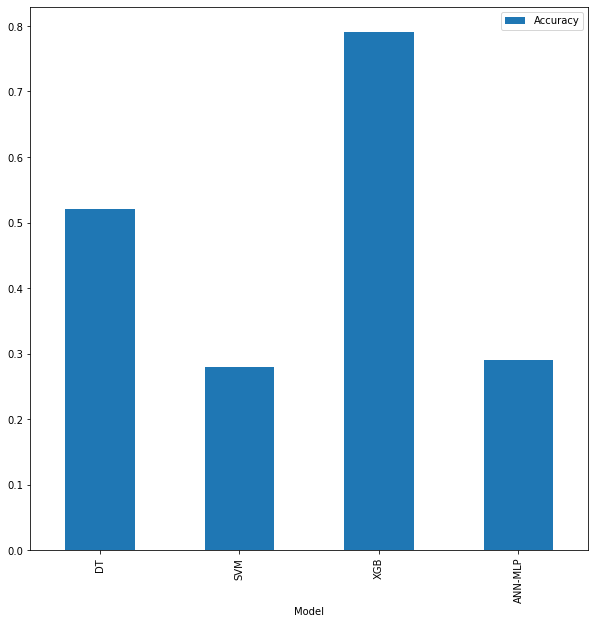

In [87]:
import matplotlib.pyplot as plt
best_results.plot(kind='bar',x='Model', figsize=(10,10))